In [1]:
import pandas as pd
import sys

In [2]:
import src.kmeans as km

In [3]:
dir(km)

['DistanceMethodNotValidError',
 'KMeansClustering',
 'NotSameLength',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'np',
 'time']

In [4]:
df1 = pd.read_csv('datasets/iris-dataset.csv')

In [5]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df2 = pd.read_csv('datasets/Iris.csv')

In [7]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
classifier = km.KMeansClustering()

In [11]:
classifier.fit(df1,[0,1,2,3],3)

In [12]:
classifier.df.Label.value_counts()

0    64
2    50
1    36
Name: Label, dtype: int64

In [13]:
df2.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [14]:
classifier.df

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [15]:
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df2.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df3 = classifier.df.copy()
df3.loc[df3['Label'] == 1, 'Label'] = 'Iris-setosa'
df3.loc[df3['Label'] == 0, 'Label'] = 'Iris-virginica'
df3.loc[df3['Label'] == 2, 'Label'] = 'Iris-versicolor'

In [18]:
acc = (df3['Label'] == df2.Species)

In [19]:
acc.value_counts()

False    101
True      49
dtype: int64

In [20]:
df4 = pd.read_csv('datasets/xclara.csv')

In [21]:
df4

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


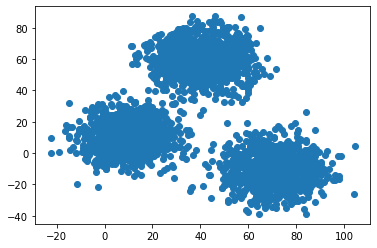

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x = df4['V1'], y = df4['V2'])
plt.show()

In [23]:
classifier2 = km.KMeansClustering()

In [24]:
classifier2.fit(df4,[0,1],3)

In [25]:
classifier2.df

,V1,V2,Label
0,2.072345,-3.241693,1
1,17.936710,15.784810,1
2,1.083576,7.319176,1
3,11.120670,14.406780,1
4,23.711550,2.557729,1
...,...,...,...
2995,85.652800,-6.461061,2
2996,82.770880,-2.373299,2
2997,64.465320,-10.501360,2
2998,90.722820,-12.255840,2


In [26]:
import numpy as np
np.array(df4['V1'])

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

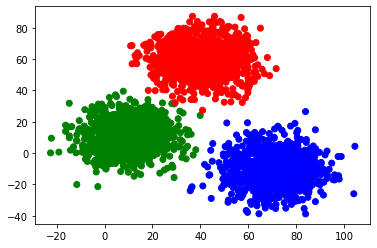

In [27]:
colormap = np.array(['r', 'g', 'b'])
labels = np.array(classifier2.df.Label)
plt.scatter(x = classifier2.df['V1'], y = classifier2.df['V2'], c=colormap[labels])
plt.show()

In [46]:
import sklearn.datasets as skd
x,y = skd.make_circles(500)#,noise=0.1,random_state=100,shuffle=True)
df = pd.DataFrame(x)

clf3 = km.KMeansClustering()

In [50]:
clf3.fit(df,[0,1],2)

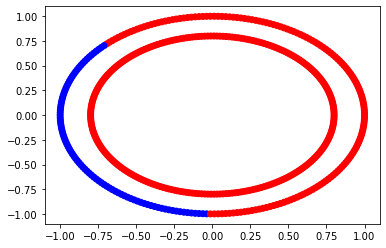

In [51]:
colormap = np.array(['r','b'])#, 'b', 'y', 'black'])
label = np.array(clf3.df.Label)
plt.scatter(x=clf3.df[0],y=clf3.df[1],c=colormap[label])
plt.show()